In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import cv2
import os
import sys
import glob
import urllib.request
import json
#import contextly 



In [28]:
file = pd.read_csv("http://ladi.s3-us-west-2.amazonaws.com/Labels/ladi_images_metadata.csv")
file

,uuid,timestamp,gps_lat,gps_lon,gps_alt,file_size,width,height,s3_path,url
0,a13fb353cca1f5e8060f95c80deb0c49e9a21f91,2016-01-16 07:34:55,29.623744,-95.652153,26.0,3497125.0,4608.0,3456.0,s3://ladi/Images/FEMA_CAP/1012/20118/VIRB0002_...,https://ladi.s3-us-west-2.amazonaws.com/Images...
1,03e5da2bc5e32cd7d58a164eefce499e2f14e06f,2014-06-24 13:09:20,32.386939,-86.344467,489.0,3518243.0,4608.0,3456.0,s3://ladi/Images/FEMA_CAP/1012/20118/VIRB0820_...,https://ladi.s3-us-west-2.amazonaws.com/Images...
2,c97e83122e14ec5fa5cfa6e2c911e066d8a07f7c,2014-06-24 11:06:27,NaN,NaN,NaN,8006650.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/1012/20118/_DSC0015_...,https://ladi.s3-us-west-2.amazonaws.com/Images...
3,c534eb158948b63508eab34a667bf495e129f455,2014-06-24 11:20:03,NaN,NaN,NaN,8821238.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/1012/20118/_DSC0123_...,https://ladi.s3-us-west-2.amazonaws.com/Images...
4,1c702459e21e5a7e7fec5eefaab42f5e5124113a,2014-06-24 11:21:07,32.371777,-86.345887,459.0,8385536.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/1012/20118/_DSC0126_...,https://ladi.s3-us-west-2.amazonaws.com/Images...
...,...,...,...,...,...,...,...,...,...,...
580746,95fabbdbbb494beab517b5fea25a4e430d8fbcef,2020-01-27 12:01:31,18.002950,-66.896370,101.8,3413576.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/9173/616637/2020_012...,https://ladi.s3-us-west-2.amazonaws.com/Images...
580747,4b590e5634dae396db6c838844d7670e5ef9e7f6,2020-01-27 12:00:25,18.003440,-66.896118,101.8,3307879.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/9173/616637/2020_012...,https://ladi.s3-us-west-2.amazonaws.com/Images...
580748,bb7f86f1e9ab1a1ab3ea9e13cda998ab6e1bbb6d,2020-01-27 12:02:25,18.003280,-66.895955,101.8,3989427.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/9173/616637/2020_012...,https://ladi.s3-us-west-2.amazonaws.com/Images...
580749,c9e5c19cb7cccf181d11b707f1a47b80341710b6,2020-01-27 12:00:45,18.003355,-66.896256,101.8,3722615.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/9173/616637/2020_012...,https://ladi.s3-us-west-2.amazonaws.com/Images...


In [22]:
file = pd.read_csv("http://ladi.s3-us-west-2.amazonaws.com/Labels/ladi_images_metadata.csv")
#maas = file.loc[(file['gps_lat'] < 43.01057360858517) & (file['gps_lat'] >  41.495414377471526) & (file['gps_lon'] > -72) &( file['gps_lon'] < - 69.92)] 
maas = file.loc[(file['gps_lat'] < 42.5) & (file['gps_lat'] >  42.439) & (file['gps_lon'] > -71.35) &( file['gps_lon'] < - 71.22)]
maas
maas.to_csv('massachusetts.csv') 

In [4]:
for idx, url in enumerate(maas['url']):
    if idx<100:
        urllib.request.urlretrieve(url, 'reconstruct_img_2/images/{}.jpg'.format(idx))


In [5]:
# Take initial guess of intrinsic parameters through metadata
!opensfm extract_metadata reconstruct_img_2/

# Detect features points 
!opensfm detect_features reconstruct_img_2/

# Match feature points across images
!opensfm match_features reconstruct_img_2/

# This creates "tracks" for the features. That is to say, if a feature in image 1 is matched with one in image 2,
# and in turn that one is matched with one in image 3, then it links the matches between 1 and 3. In this case, 
# it does not matter since we only have two images
!opensfm create_tracks reconstruct_img_2/

# Calculates the essential matrix, the camera pose and the reconstructed feature points
!opensfm reconstruct reconstruct_img_2/

# For visualization using Open3D
!opensfm export_ply reconstruct_img_2/

2020-07-30 22:48:29,799 INFO: Extracting EXIF for 72.jpg
2020-07-30 22:48:29,840 INFO: Extracting EXIF for 79.jpg
2020-07-30 22:48:29,879 INFO: Extracting EXIF for 66.jpg
2020-07-30 22:48:29,917 INFO: Extracting EXIF for 6.jpg
2020-07-30 22:48:29,957 INFO: Extracting EXIF for 37.jpg
2020-07-30 22:48:29,994 INFO: Extracting EXIF for 38.jpg
2020-07-30 22:48:30,032 INFO: Extracting EXIF for 5.jpg
2020-07-30 22:48:30,069 INFO: Extracting EXIF for 40.jpg
2020-07-30 22:48:30,107 INFO: Extracting EXIF for 25.jpg
2020-07-30 22:48:30,144 INFO: Extracting EXIF for 58.jpg
2020-07-30 22:48:30,182 INFO: Extracting EXIF for 18.jpg
2020-07-30 22:48:30,220 INFO: Extracting EXIF for 69.jpg
2020-07-30 22:48:30,257 INFO: Extracting EXIF for 83.jpg
2020-07-30 22:48:30,294 INFO: Extracting EXIF for 45.jpg
2020-07-30 22:48:30,330 INFO: Extracting EXIF for 43.jpg
2020-07-30 22:48:30,376 INFO: Extracting EXIF for 64.jpg
2020-07-30 22:48:30,417 INFO: Extracting EXIF for 16.jpg
2020-07-30 22:48:30,454 INFO: Ext

In [ ]:
!opensfm undistort reconstruct_img_2/

!opensfm compute_depthmaps reconstruct_img_2/

2020-07-30 23:07:27,868 DEBUG: Undistorting the reconstruction
2020-07-30 23:07:28,409 DEBUG: Undistorting image 65.jpg
2020-07-30 23:07:31,164 DEBUG: Undistorting image 66.jpg
2020-07-30 23:07:33,988 DEBUG: Undistorting image 64.jpg
2020-07-30 23:07:36,854 DEBUG: Undistorting image 67.jpg
2020-07-30 23:07:39,649 DEBUG: Undistorting image 68.jpg
2020-07-30 23:07:42,510 DEBUG: Undistorting image 69.jpg
2020-07-30 23:07:45,386 DEBUG: Undistorting image 70.jpg
2020-07-30 23:07:48,250 DEBUG: Undistorting image 71.jpg
2020-07-30 23:07:50,965 DEBUG: Undistorting image 62.jpg
2020-07-30 23:07:53,824 DEBUG: Undistorting image 63.jpg
2020-07-30 23:07:56,633 DEBUG: Undistorting image 72.jpg
2020-07-30 23:07:59,395 DEBUG: Undistorting image 74.jpg
2020-07-30 23:08:02,268 DEBUG: Undistorting image 73.jpg
2020-07-30 23:08:05,152 DEBUG: Undistorting image 75.jpg
2020-07-30 23:08:08,018 DEBUG: Undistorting image 33.jpg
2020-07-30 23:08:10,847 DEBUG: Undistorting image 34.jpg
2020-07-30 23:08:15,838 I

In [11]:
# Origin of our reconstruction, as given by the reference_lla.json (made from the reconstruction)
with open("reconstruct_img_2/reference_lla.json", "r") as f:
    reference_lla = json.load(f)
    latitude=reference_lla["latitude"]
    longitude=reference_lla["longitude"]
    altitude=reference_lla["altitude"]

# This is the json file that contains the reconstructed feature points
with open("reconstruct_img_2/reconstruction.json", "r") as f:
    reconstructions = json.load(f)

In [8]:
import open3d as o3d
from open3d import JVisualizer

pcd = o3d.io.read_point_cloud("reconstruct_img_2/reconstruction.ply")
visualizer = JVisualizer()
visualizer.add_geometry(pcd)
visualizer.show()

JVisualizer with 1 geometries

In [13]:
try:
    from pymap3d import enu2geodetic
except:
    !pip install pymap3d
    from pymap3d import enu2geodetic
from opensfm.features import denormalized_image_coordinates

# reading the csv
tracks = pd.read_csv("reconstruct_img_2/tracks.csv", sep="\t", skiprows=1, names=["image_name", "track_id", "feature_id", "x", "y", "s", "R", "G", "B"])

# we need to denormalize the coordinates to turn them into regular pixel coordinates
normalized_coor = tracks[["x", "y", "s"]]
denormalized_coor = denormalized_image_coordinates(normalized_coor.values, 4496, 3000)

# create a new column with the denormalized coordinates
tracks["denorm_x"] = denormalized_coor[:, 0]
tracks["denorm_y"] = denormalized_coor[:, 1]

In [ ]:
import shutil
import gdal, osr
try:
    from pymap3d import enu2geodetic
except:
    !pip install pymap3d
    from pymap3d import enu2geodetic

import random
from skimage import transform

if not os.path.isdir("reconstruct_img_2/geotiff/"):
    os.mkdir("reconstruct_img_2/geotiff/")
if not os.path.isdir("reconstruct_img_2/ortho/"):
    os.mkdir("reconstruct_img_2/ortho/")

for reconst in reconstructions:
    for shot in reconst["shots"]:
        # some housekeeping
        shot_name = shot.split(".")[0]
        img = cv2.imread("reconstruct_img_2/images/"+shot)
        shape = img.shape
        
        # here we get the features from the image and their corresponding reconstructed features
        reconst_ids = list(map(int, reconst["points"].keys()))
        tracks_shot = tracks[(tracks["image_name"] == shot) & (tracks["track_id"].isin(reconst_ids))]
        denorm_shot = np.round(tracks_shot[["denorm_x", "denorm_y"]].values)
        reconst_shot = np.array([reconst["points"][str(point)]["coordinates"] for point in tracks_shot["track_id"]])
        
        # we're going to create an image that is distorted to fit within the world coordinates
        # pix_shot is just the reconstructed feature coordinates offset by some amount so that
        # all coordinates are positive.
        offset = np.min(reconst_shot[:, :2])
        pix_shot = reconst_shot[:, :2]-np.multiply(offset, offset<0)
        
        # transformation for the new orthorectified image
        H, inliers = cv2.findHomography(denorm_shot, pix_shot)
        
        # filtering out points that didn't fit the transformation
        reconst_shot = reconst_shot[inliers.ravel()==1, :]
        denorm_shot = np.round(denorm_shot[inliers.ravel()==1, :])
        pix_shot = np.round(pix_shot[inliers.ravel()==1, :])
        
        # creating the ortho image
        shape = tuple(np.max(pix_shot, axis=0).astype(int))
        ortho_img = cv2.warpPerspective(img, H, shape)
        cv2.imwrite("reconstruct_img_2/ortho/" + shot + "_ortho.jpg", ortho_img)
        
        # here we convert all of the reconstructed points into lat/lon coordinates
        geo_shot = np.array([enu2geodetic(reconst_shot[i, 0],reconst_shot[i, 1],reconst_shot[i, 2],latitude,longitude,altitude) for i in range(reconst_shot.shape[0])])        
        
        idx = random.sample(range(len(geo_shot)), 10)
        pix_shot_sample = pix_shot[idx, :]
        geo_shot_sample = geo_shot[idx, :]
                
        # creating the Ground Control Points
        orig_fn = "reconstruct_img_2/ortho/" + shot + "_ortho.jpg"
        fn = "reconstruct_img_2/geotiff/" + shot_name + "_GCP.tif"
        
        orig_ds = gdal.Open(orig_fn)
        gdal.GetDriverByName('GTiff').CreateCopy(fn, orig_ds)
        ds = gdal.Open(fn, gdal.GA_Update)
        sr = osr.SpatialReference()
        sr.SetWellKnownGeogCS('WGS84')
        
        gcps = [gdal.GCP(geo_shot_sample[i, 1], geo_shot_sample[i, 0], 0, int(pix_shot_sample[i, 0]), int(pix_shot_sample[i, 1])) for i in range(geo_shot_sample.shape[0])]
        
        ds.SetGCPs(gcps, sr.ExportToWkt())
        
        ds = None
        


In [ ]:
import rasterio
import rasterio.plot

fig = plt.figure(figsize=(15, 15))
files = [os.path.join('CAP_sample_1/geotiff/', f) for f in os.listdir('CAP_sample_1/geotiff/') if f.endswith("tif")]

for i, file in enumerate(files):
    with rasterio.open(file, "r") as dataset:
#         dataset_mask = dataset.read_masks(1)
#         dataset_read = dataset.read(1)
#         rasterio.plot.show(np.ma.masked_where(dataset_mask==0, dataset_read), ax=ax)
        ax = fig.add_subplot(3, 2, i+1)
        rasterio.plot.show(dataset, ax=ax)
        ax.axis("equal")

In [14]:
from shapely.geometry import Polygon
import geopandas as gpd

img_name_list = []
poly_list = []

for reconst in reconstructions:
    for shot in reconst["shots"]:
        # some housekeeping
        shot_name = shot.split(".")[0]
        img = cv2.imread("reconstruct_img_2/images/"+shot) 
        h,w,_ = img.shape
        
        # here we get the features from the image and their corresponding reconstructed features
        reconst_ids = list(map(int, reconst["points"].keys()))
        tracks_shot = tracks[(tracks["image_name"] == shot) & (tracks["track_id"].isin(reconst_ids))]
        
        normalized_coor = tracks_shot[["x", "y", "s"]]
        denormalized_coor = denormalized_image_coordinates(normalized_coor.values, w, h)
        
        tracks_shot["denorm_x"] = denormalized_coor[:, 0]
        tracks_shot["denorm_y"] = denormalized_coor[:, 1]
        
        denorm_shot = np.round(tracks_shot[["denorm_x", "denorm_y"]].values)
        reconst_shot = np.array([reconst["points"][str(point)]["coordinates"] for point in tracks_shot["track_id"]])
        
        # transformation for the new orthorectified image
        H, inliers = cv2.findHomography(denorm_shot, reconst_shot[:, :2],cv2.RANSAC,5.0)
        
        
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,H)[:,0,:]
        #print(dst)
                
        geo_shot = np.array([enu2geodetic(dst[i, 0],dst[i, 1],0,longitude,latitude,altitude) for i in range(dst.shape[0])])  
        
        poly_points_list = geo_shot[:, :2].tolist()
        poly_points_tuples = tuple(map(tuple, poly_points_list))
        #print(poly_points_tuples)
        
        img_name_list.append(shot_name)
        poly_list.append(Polygon(poly_points_tuples))

used_images = gpd.GeoDataFrame({'image_name':img_name_list, 'geometry':poly_list}, crs='EPSG:4326')
#used_images

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
#tracks_shot['geometry'] = Polygon
#used_images.to_file('used_images')
used_images['geometry']

0     POLYGON ((-71.28778 42.46460, -71.28408 42.464...
1     POLYGON ((-71.14491 42.57808, -71.28577 42.465...
2     POLYGON ((-71.28746 42.46533, -71.28881 42.468...
3     POLYGON ((-71.28406 42.46768, -71.28578 42.465...
4     POLYGON ((-71.28568 42.46561, -71.28613 42.465...
                            ...                        
56    POLYGON ((-71.28647 42.46554, -71.28680 42.465...
57    POLYGON ((-71.28646 42.46548, -71.28650 42.465...
58    POLYGON ((-71.28648 42.46552, -71.28650 42.465...
59    POLYGON ((-71.28649 42.46546, -71.28651 42.465...
60    POLYGON ((-71.28649 42.46553, -71.28651 42.465...
Name: geometry, Length: 61, dtype: geometry

In [16]:
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
import geopandas
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt
import contextily as ctx

In [23]:
l1=[]
import geopandas
#maas[maas.apply(lambda x: x.isnumeric())]
#maas.apply(l1.append([maas['gps_lat'], maas['gps_lon']]))
l1
gmaas = geopandas.GeoDataFrame( maas, geometry=geopandas.points_from_xy(maas.gps_lon, maas.gps_lat))
gmaas

,uuid,timestamp,gps_lat,gps_lon,gps_alt,file_size,width,height,s3_path,url,geometry
60899,104629a5bcbbe2e089a9985285213c29bdb148df,2018-03-06 14:39:44,42.465315,-71.285882,39.0,3187899.0,4496.0,3000.0,s3://ladi/Images/FEMA_CAP/9082/614360/DSC_6899...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-71.28588 42.46532)
162639,56dfd51fb686239aeca1554d10a5ccdd52480e48,2016-04-27 09:41:14,42.464558,-71.295733,70.7,2030312.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/2027/160642/IMG_0643...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-71.29573 42.46456)
162640,ecf4b17402e0678b9b03847ff8a38260b39fc1dc,2016-04-27 09:42:03,42.477610,-71.281935,71.0,4062704.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/2027/160642/IMG_0645...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-71.28194 42.47761)
162641,bb36bdfd35ea5d92d85cbc6440dd922ee596cb04,2016-04-27 09:42:48,42.489595,-71.271068,NaN,3010602.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/2027/160642/IMG_0646...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-71.27107 42.48960)
201854,f73e8706877930fb873470812e8ffa2193cd3c14,2018-09-14 15:16:25,42.465248,-71.286087,98.6,2627067.0,4496.0,3000.0,s3://ladi/Images/FEMA_CAP/9098/614974/DSC_0074...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-71.28609 42.46525)
...,...,...,...,...,...,...,...,...,...,...,...
566044,48c0be0af3e81403e875d7d553908b25ad7af425,2019-11-02 14:44:24,42.442575,-71.256050,632.0,8115231.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/9171/616373/MA_039_2...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-71.25605 42.44257)
566045,4499cefc887b62691f4e828f7295fb33c1c08176,2019-11-02 14:46:37,42.476592,-71.278585,641.0,8991796.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/9171/616373/MA_039_2...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-71.27858 42.47659)
566046,3d0d631c021d1ca73000c724c7b76b682096ee91,2019-11-02 14:46:52,42.478520,-71.287753,625.0,8036453.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/9171/616373/MA_039_2...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-71.28775 42.47852)
566047,f1c3529d305b1832d38842456f450a9c0dbe6893,2019-11-02 14:42:54,42.446118,-71.299238,603.0,9642683.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/9171/616373/MA_039_2...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-71.29924 42.44612)


In [26]:
gmaas.crs = 'epsg:4326'
gmaas = gmaas.to_crs(epsg=3857)
maas.to_csv('Gmassachusetts.csv') 


in first
in second
gonna plt


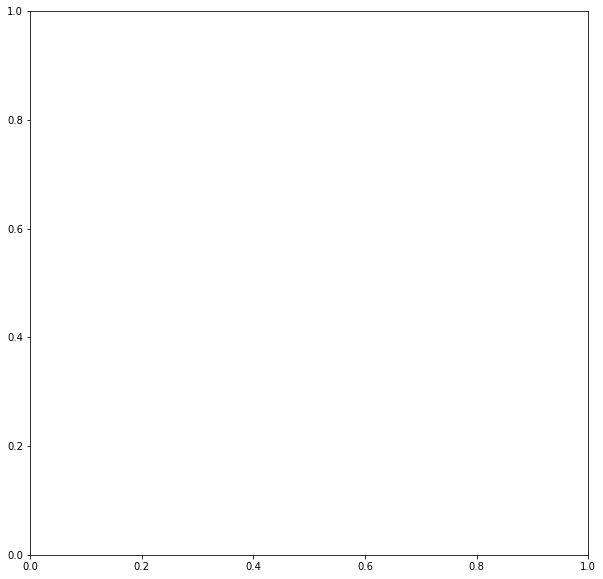

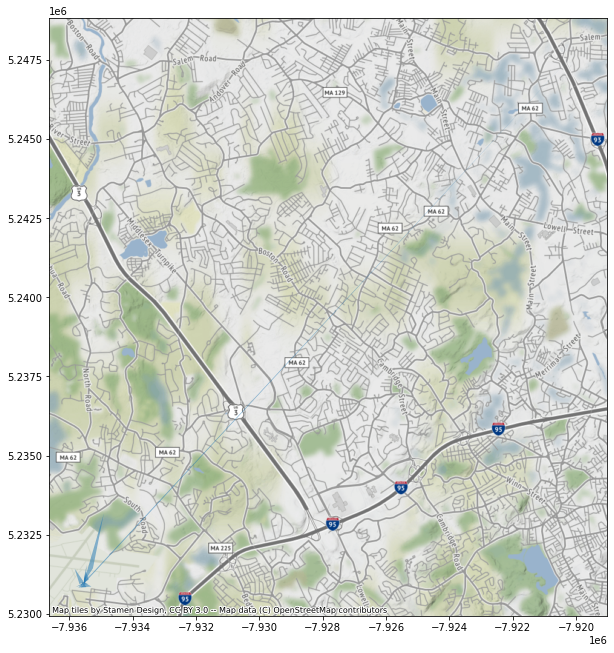

In [62]:
import rasterio
import rasterio.plot

#used_images.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
fig, ax = plt.subplots(1, figsize=(10,10))
ax = gmaas.plot(figsize=(10, 250))
used_images = used_images.to_crs(epsg=3857)
used_images.plot(figsize=(10, 250), alpha=0.5, ax=ax)
ctx.add_basemap(ax)
fig.show()

with rasterio.open('post-event-images/cropped-ma-orig.tif', 'r') as src:
    print('in first')
    orig = src.read(1)
    orig_mask = src.read_masks(1)
    orig_transform = src.profile['transform']

    final_mask = np.ma.masked_where(orig_mask==0, orig)

    with rasterio.open('post-event-images/cropped-ma-hs.tif', 'r') as src2:
        print('in second')
        hs = src2.read(1)
        hs_mask = src2.read_masks(1)
#         fig, ax = plt.subplots(1,figsize = (10,10))
        hs_transform = src2.profile['transform']
        final_hs = np.ma.masked_where(hs_mask == 0, hs)
        final_hs = np.ma.masked_where(final_mask == 0, final_hs)

        rasterio.plot.show(final_hs, transform=hs_transform, ax=ax)
    
    print('gonna plt')
    plt.show() 
    
    
#used_images = used_images.to_crs(epsg=3857)
#ax2 = used_images.to_crs(epsg=2163).plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
#ax2.set_xlim(0, 100)
#ctx.add_basemap(ax2)

#ax = used_images.to_crs(epsg=3857).plot(column='geometry', figsize=(100,100), alpha=0.6, cmap='binary')
#ctx.add_basemap(ax)
#used_images = used_images.to_crs(epsg=3857)
#ax = used_images.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
#ctx.add_basemap(ax)
#used_images.head(10)
#used_images = GeoDataFrame(used_images, crs= {"init": "epsg:4326"}) # Create a georeferenced dataframe  
#used_images = used_images.to_crs(epsg=3857) # reproject it in Web mercator
#ax = used_images.plot()

# choose any of the supported maps from ctx.sources
#ctx.add_basemap(ax)
#ax.set_axis_off()
#plt.show()

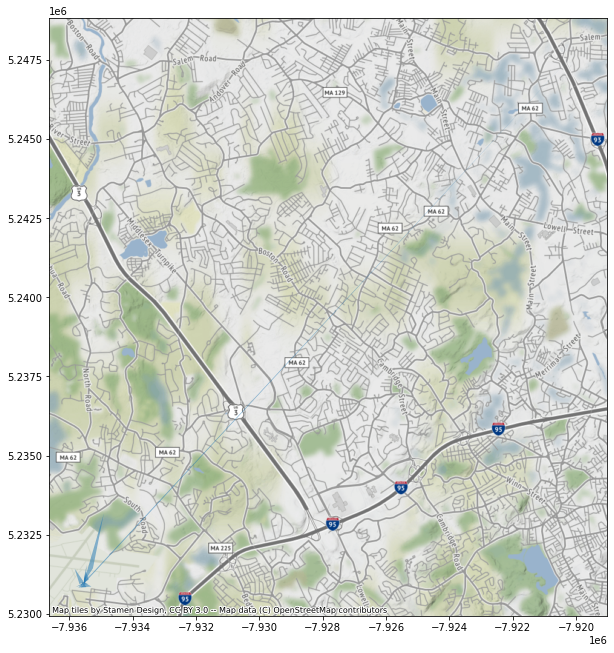

In [30]:
ax3 = gmaas.plot(figsize=(10, 250))
used_images = used_images.to_crs(epsg=3857)
used_images.plot(figsize=(10, 250), alpha=0.5, ax=ax3)
ctx.add_basemap(ax3)


,uuid,timestamp,gps_lat,gps_lon,gps_alt,file_size,width,height,s3_path,url,geometry
60899,104629a5bcbbe2e089a9985285213c29bdb148df,2018-03-06 14:39:44,42.465315,-71.285882,39.0,3187899.0,4496.0,3000.0,s3://ladi/Images/FEMA_CAP/9082/614360/DSC_6899...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (inf inf)
162639,56dfd51fb686239aeca1554d10a5ccdd52480e48,2016-04-27 09:41:14,42.464558,-71.295733,70.7,2030312.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/2027/160642/IMG_0643...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (inf inf)
162640,ecf4b17402e0678b9b03847ff8a38260b39fc1dc,2016-04-27 09:42:03,42.477610,-71.281935,71.0,4062704.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/2027/160642/IMG_0645...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (inf inf)
162641,bb36bdfd35ea5d92d85cbc6440dd922ee596cb04,2016-04-27 09:42:48,42.489595,-71.271068,NaN,3010602.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/2027/160642/IMG_0646...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (inf inf)
201854,f73e8706877930fb873470812e8ffa2193cd3c14,2018-09-14 15:16:25,42.465248,-71.286087,98.6,2627067.0,4496.0,3000.0,s3://ladi/Images/FEMA_CAP/9098/614974/DSC_0074...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (inf inf)
...,...,...,...,...,...,...,...,...,...,...,...
566044,48c0be0af3e81403e875d7d553908b25ad7af425,2019-11-02 14:44:24,42.442575,-71.256050,632.0,8115231.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/9171/616373/MA_039_2...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (inf inf)
566045,4499cefc887b62691f4e828f7295fb33c1c08176,2019-11-02 14:46:37,42.476592,-71.278585,641.0,8991796.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/9171/616373/MA_039_2...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (inf inf)
566046,3d0d631c021d1ca73000c724c7b76b682096ee91,2019-11-02 14:46:52,42.478520,-71.287753,625.0,8036453.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/9171/616373/MA_039_2...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (inf inf)
566047,f1c3529d305b1832d38842456f450a9c0dbe6893,2019-11-02 14:42:54,42.446118,-71.299238,603.0,9642683.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/9171/616373/MA_039_2...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (inf inf)


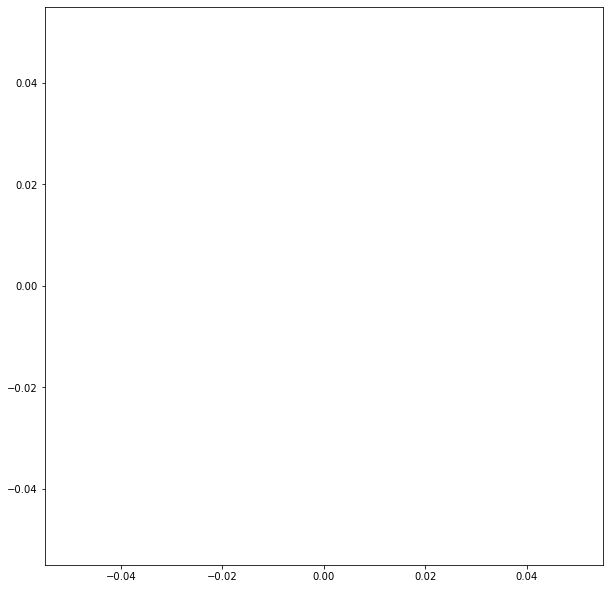

In [29]:
gmaas.plot(figsize=(10, 250))
gmaas

In [31]:
import networkx as nx
try:
  import osmnx as ox
except:
  # osmnx depends on the system package libspatialindex
  !apt install libspatialindex-dev
  !pip install osmnx
  import osmnx as ox

try: 
  import geopandas as gpd
except: 
  !pip install geopandas 
  import geopandas as gpd

try:
  import contextily as ctx 
except:
  # install dependencies for contextily
  !apt install libproj-dev proj-data proj-bin
  !apt install libgeos-dev
  !pip install cython
  !pip install cartopy
  # install contextily
  !pip install contextily==1.0rc1 --no-use-pep517 --no-cache-dir
  import contextily as ctx

import fiona
import fiona.crs
from shapely.geometry import Point, LineString, Polygon
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [32]:
maas = file.loc[(file['gps_lat'] < 42.368520) & (file['gps_lat'] > 41.791453) & (file['gps_lon'] > -73.255974) &( file['gps_lon'] < - 69.998533)]
abbrev_maas = maas

In [33]:
gdf = gpd.GeoDataFrame(abbrev_maas, geometry=gpd.points_from_xy(abbrev_maas.gps_lon, abbrev_maas.gps_lat))
gdf

,uuid,timestamp,gps_lat,gps_lon,gps_alt,file_size,width,height,s3_path,url,geometry
8291,58d6cb556e28ed809e02667c179f3cce6656faed,2018-03-04 16:27:46,42.080165,-70.622210,470.0,9082447.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/9082/614359/DSC_1426...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-70.62221 42.08017)
8292,bbd8403d8ae4b5c026f276416cdf24d3cc63c36b,2018-03-04 16:27:51,42.081870,-70.623698,478.0,9308484.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/9082/614359/DSC_1427...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-70.62370 42.08187)
8293,0df2e8ce8f3e5972f24f1244b2b03fd79ec6cd29,2018-03-04 16:27:53,42.082597,-70.624313,467.0,9312351.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/9082/614359/DSC_1428...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-70.62431 42.08260)
8294,6163c19e6a434cd5f5708b42f4632320b9cecccb,2018-03-04 16:27:57,42.084150,-70.625782,475.0,8589006.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/9082/614359/DSC_1429...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-70.62578 42.08415)
8295,2c5585f4703d819cc2978816b34d962cae7baac5,2018-03-04 16:27:59,42.084782,-70.626448,467.0,9098233.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/9082/614359/DSC_1430...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-70.62645 42.08478)
...,...,...,...,...,...,...,...,...,...,...,...
573070,7d3184c736ec2b7703d27005474c2d2d515b4ef4,2019-11-23 15:17:16,41.947585,-72.620515,194.0,1703608.0,4496.0,3000.0,s3://ladi/Images/FEMA_CAP/5/616524/RRTask22_2d...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-72.62051 41.94758)
573071,6c9b03cf1018b318bc17e5f169b737da116fce9f,2019-11-23 15:16:15,41.952013,-72.644547,219.0,1668936.0,4496.0,3000.0,s3://ladi/Images/FEMA_CAP/5/616524/RRTask22_3a...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-72.64455 41.95201)
573072,588f4f1d6072539ada45d73c9c74bbf8b72e20d2,2019-11-23 15:15:08,41.940983,-72.670312,232.0,1648900.0,4496.0,3000.0,s3://ladi/Images/FEMA_CAP/5/616524/RRTask22_85...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-72.67031 41.94098)
573073,3b3e4ff818d0783fcb6859124ff4cbdc6831c3d6,2019-11-23 15:17:10,41.949347,-72.622558,187.0,1699969.0,4496.0,3000.0,s3://ladi/Images/FEMA_CAP/5/616524/RRTask22_94...,https://ladi.s3-us-west-2.amazonaws.com/Images...,POINT (-72.62256 41.94935)


In [34]:
post_hurricane_gpd = gpd.read_file('post-event-game-grid.geojson')


In [65]:
post_hurricane_gpd

,MGRS,kmSQ_ID,GZD,EASTING,NORTHING,MGRS_10km,Shape_Leng,Shape_Le_1,Shape_Area,x_centroid,y_centroid,Health,Utility,Transport,population,SVI,geometry
0,19TBH7264,BH,19T,272000mE,4764000mN,19TBH76,0.042522,0.042522,0.000110,-71.791007,42.999142,9,7,3,15.0,0.2113,"POLYGON ((-7991033.712 5311179.522, -7992397.7..."
1,19TBH7364,BH,19T,273000mE,4764000mN,19TBH76,0.042523,0.042523,0.000110,-71.778753,42.999441,8,7,3,11.0,0.2113,"POLYGON ((-7989669.690 5311224.829, -7991033.7..."
2,19TBH7464,BH,19T,274000mE,4764000mN,19TBH76,0.042523,0.042523,0.000110,-71.766499,42.999738,8,7,3,14.0,0.2113,"POLYGON ((-7988305.646 5311269.937, -7989669.6..."
3,19TBH7564,BH,19T,275000mE,4764000mN,19TBH76,0.042523,0.042523,0.000110,-71.754245,43.000033,9,7,3,21.0,0.2113,"POLYGON ((-7986941.582 5311314.845, -7988305.6..."
4,19TBH7664,BH,19T,276000mE,4764000mN,19TBH76,0.042524,0.042524,0.000110,-71.741990,43.000328,9,7,3,28.0,0.0336,"POLYGON ((-7985577.497 5311359.555, -7986941.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,19TDG1600,DG,19T,416000mE,4600000mN,19TDG10,0.041993,0.041993,0.000108,-70.001238,41.551809,7,2,2,0.0,0.0495,"POLYGON ((-7791827.195 5093415.199, -7793161.7..."
15886,19TDG1700,DG,19T,417000mE,4600000mN,19TDG10,0.041993,0.041993,0.000108,-69.989249,41.551913,9,3,3,0.0,0.0495,"POLYGON ((-7790492.658 5093430.539, -7791827.1..."
15887,19TDF1599,DF,19T,415000mE,4599000mN,19TDF19,0.041990,0.041990,0.000108,-70.013087,41.542698,7,4,3,0.0,0.0495,"POLYGON ((-7793146.168 5092060.201, -7794480.5..."
15888,19TDF1699,DF,19T,416000mE,4599000mN,19TDF19,0.041990,0.041990,0.000108,-70.001099,41.542803,10,5,1,0.0,0.0495,"POLYGON ((-7791811.823 5092075.720, -7793146.1..."


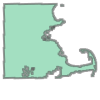

In [35]:
from shapely.ops import unary_union
from shapely.geometry import Polygon

polygons = post_hurricane_gpd['geometry'].to_crs('epsg:4326')

polygons
polygon3 = unary_union(polygons)
polygon3


In [67]:
polygons

0        POLYGON ((-71.78468 42.99479, -71.79693 42.994...
1        POLYGON ((-71.77242 42.99509, -71.78468 42.994...
2        POLYGON ((-71.76017 42.99539, -71.77242 42.995...
3        POLYGON ((-71.74792 42.99568, -71.76017 42.995...
4        POLYGON ((-71.73566 42.99598, -71.74792 42.995...
                               ...                        
15885    POLYGON ((-69.99517 41.54736, -70.00716 41.547...
15886    POLYGON ((-69.98319 41.54746, -69.99517 41.547...
15887    POLYGON ((-70.00702 41.53825, -70.01901 41.538...
15888    POLYGON ((-69.99504 41.53835, -70.00702 41.538...
15889    POLYGON ((-69.98305 41.53846, -69.99504 41.538...
Name: geometry, Length: 15890, dtype: geometry

In [68]:
polygon3.bounds

(-71.80631774396869, 41.495414377471526, -69.9250432551421, 43.01057360858517)

In [36]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box
poly_gdf = gpd.GeoDataFrame()
new_gdf = gpd.GeoDataFrame()
for index, row in gdf.head(100).iterrows():
    new_poly = row['geometry'].buffer(.1)
#     temp_gdf = ox.pois.pois_from_polygon(new_poly, tags = {'aeroway': True, 'building': 'yes'})
    temp_gdf = ox.pois.pois_from_polygon(new_poly, tags = {'aeroway': True, 'amenity': True })
    new_gdf = new_gdf.append(temp_gdf)
#     poly_gdf = poly_gdf.append(new_poly)
#     print(temp_gdf)

/opt/conda/lib/python3.7/site-packages/osmnx/pois.py:370: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf = gdf.loc[gdf["geometry"].centroid.within(polygon)]


In [37]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box
poly_gdf = gpd.GeoDataFrame()
new_gdf = gpd.GeoDataFrame()
#new_poly = row['geometry'].buffer(.1)
#     temp_gdf = ox.pois.pois_from_polygon(new_poly, tags = {'aeroway': True, 'building': 'yes'})
temp_gdf = ox.pois.pois_from_polygon(polygon3, tags = {'aeroway': True, 'amenity': 'hospital', 'amenity': 'social_facility', 'amenity': 'clinic' })
#new_gdf = new_gdf.append(temp_gdf)
#     poly_gdf = poly_gdf.append(new_poly)
#     print(temp_gdf)

AttributeError: 'numpy.ndarray' object has no attribute 'axis'

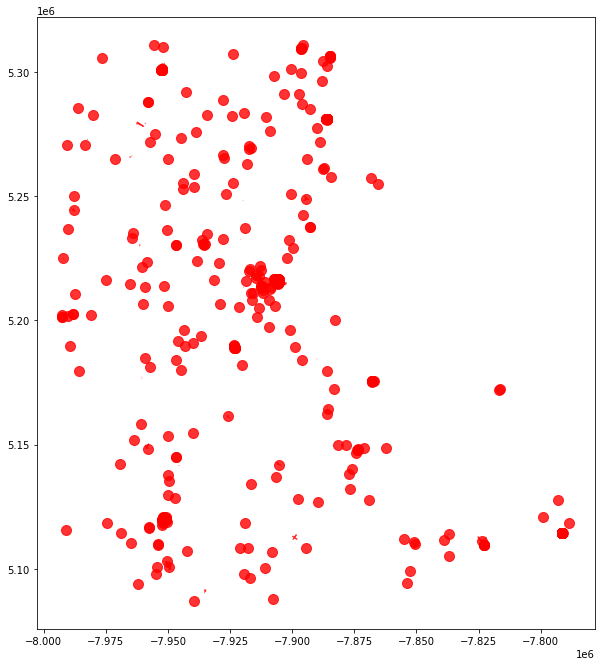

In [39]:
# gdf = gdf.head(10)
# gdf.crs = {'init' :'epsg:4326'}
# roads = ox.graph.graph_from_bbox(gdf['gps_lat'].max(), gdf['gps_lat'].min(), gdf['gps_lon'].max(), gdf['gps_lon'].min())
ax7 = temp_gdf.to_crs(epsg=3857).plot(figsize=(10, 350), alpha=.8, color='red', markersize = 100)
#gdf.to_crs(epsg=3857).plot(figsize=(10, 350), alpha=.8, color="blue", ax=ax)
ctx.add_basemap(ax)

In [40]:
import contextily as ctx


In [41]:



# Dataframe you want to plot
gmaas2 = GeoDataFrame(gmaas, crs= {"init": "epsg:4326"}) # Create a georeferenced dataframe  
gmaas2 = gmaas2.to_crs(epsg=3857) # reproject it in Web mercator


/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  


In [42]:
file = pd.read_csv("http://ladi.s3-us-west-2.amazonaws.com/Labels/ladi_images_metadata.csv")
maas3 = file.loc[(file['gps_lat'] < 42.5) & (file['gps_lat'] >  42.439) & (file['gps_lon'] > -71.35) &( file['gps_lon'] < - 71.22)] 

In [92]:
# maas3`
# gmaas7 = geopandas.GeoDataFrame( maas3, geometry=geopandas.points_from_xy(maas.gps_lon, maas.gps_lat))
# gmaas3 = GeoDataFrame(gmaas7, crs= {"init": "epsg:4326"}) # Create a georeferenced dataframe  
# gmaas3 = gmaas3.to_crs(epsg=3857) # reproject it in Web mercator

ValueError: Length of values does not match length of index

In [43]:
#fig1= plt.figure()

ax6 = gmaas3.plot(figsize=(100, 250))
#ax8 = fig1.add_subplot()
# choose any of the supported maps from ctx.sources
ctx.add_basemap(ax6, url='http://tile.stamen.com/watercolor/tileZ/tileX/tileY.png')
temp_gdf.to_crs(epsg=3857).plot(figsize=(10, 350), alpha=.8, color='black', ax=ax6, markersize = 800)

ax.set_axis_off()
plt.show()

NameError: name 'gmaas3' is not defined

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  
/opt/conda/lib/python3.7/site-packages/contextily/tile.py:268: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  FutureWarning,


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7effb85fd6b0>

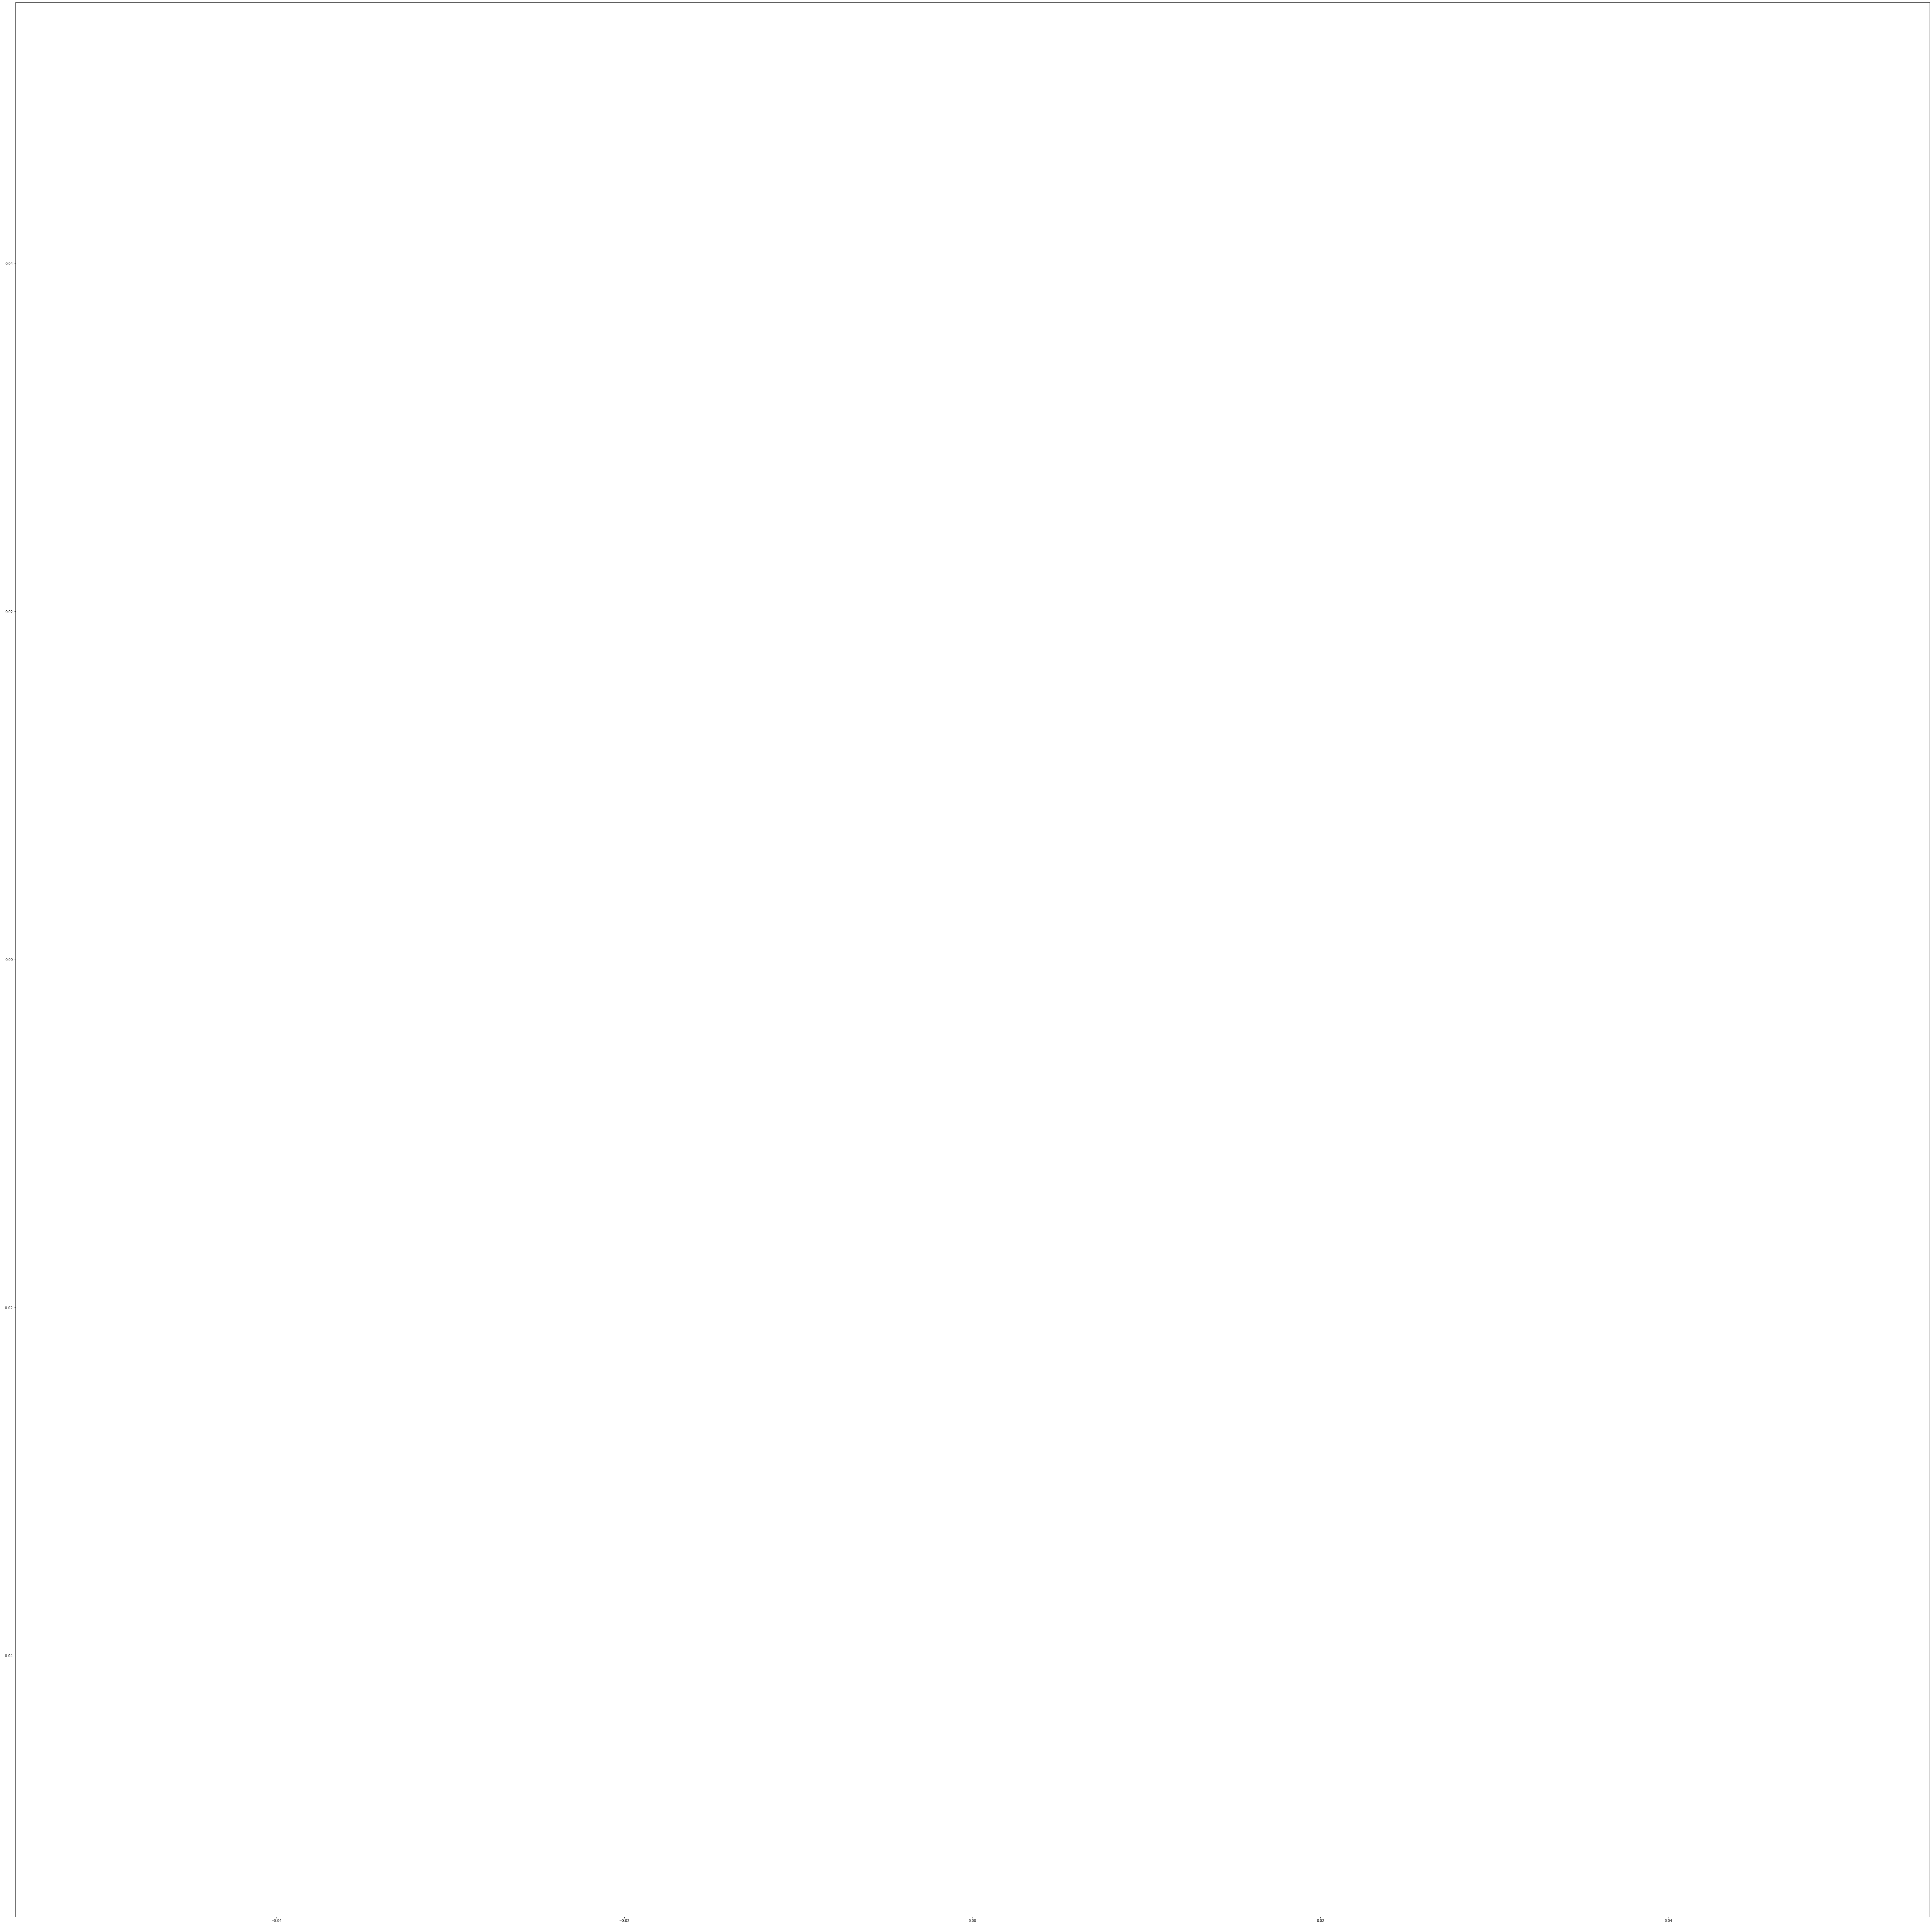

In [45]:
#fig1= plt.figure()

ax5 = gmaas2.plot(figsize=(100, 250))
#ax8 = fig1.add_subplot()
# choose any of the supported maps from ctx.sources
ctx.add_basemap(ax5, url='http://tile.stamen.com/watercolor/tileZ/tileX/tileY.png')
temp_gdf.to_crs(epsg=3857).plot(figsize=(10, 350), alpha=.8, color='black', ax=ax5, markersize = 800)

ax.set_axis_off()
plt.show()

SyntaxError: invalid syntax (<ipython-input-34-337af2bc9be9>, line 1)

In [94]:
try:
  import rasterio
  import rasterio.plot
except:
  !pip install rasterio
  import rasterio
  import rasterio.plot



In [73]:
filepath = pd.read_csv("denver_dems.csv")

filepath


,sourceId,extent,sourceOriginName,boundingBox,sizeInBytes,bestFitIndex,format,downloadURL,previewGraphicURL,prettyFileSize,datasets,title,sourceOriginId,lastUpdated,dateCreated,metaUrl,sourceName,publicationDate
0,5deb3285e4b02caea0f0e9f1,1 x 1 degree,gda,"{minY:36.9993520146,minX:-106.000556022,maxY:3...",369438874,0.025057,GeoTIFF,https://prd-tnm.s3.amazonaws.com/StagedProduct...,https://prd-tnm.s3.amazonaws.com/StagedProduct...,352.32 MB,[National Elevation Dataset (NED) 1/3 arc-seco...,USGS 13 arc-second n38w106 1 x 1 degree,14429415,2020-03-03,2019-12-06,https://www.sciencebase.gov/catalog/item/5deb3...,ScienceBase,2019-06-21
1,5deb3281e4b02caea0f0e9ed,1 x 1 degree,gda,"{minY:36.99944444444,minX:-104.0005555556,maxY...",360458913,0.025053,GeoTIFF,https://prd-tnm.s3.amazonaws.com/StagedProduct...,https://prd-tnm.s3.amazonaws.com/StagedProduct...,343.76 MB,[National Elevation Dataset (NED) 1/3 arc-seco...,USGS 13 arc-second n38w104 1 x 1 degree,14429123,2020-03-03,2019-12-06,https://www.sciencebase.gov/catalog/item/5deb3...,ScienceBase,2013-01-01
2,5deb3295e4b02caea0f0ea59,1 x 1 degree,gda,"{minY:37.99944444444,minX:-108.0005555556,maxY...",408113052,0.025053,GeoTIFF,https://prd-tnm.s3.amazonaws.com/StagedProduct...,https://prd-tnm.s3.amazonaws.com/StagedProduct...,389.21 MB,[National Elevation Dataset (NED) 1/3 arc-seco...,USGS 13 arc-second n39w108 1 x 1 degree,14429709,2020-03-03,2019-12-06,https://www.sciencebase.gov/catalog/item/5deb3...,ScienceBase,2013-01-01
3,5deb3281e4b02caea0f0e9ef,1 x 1 degree,gda,"{minY:36.99944444444,minX:-105.0005555556,maxY...",367232018,0.025053,GeoTIFF,https://prd-tnm.s3.amazonaws.com/StagedProduct...,https://prd-tnm.s3.amazonaws.com/StagedProduct...,350.22 MB,[National Elevation Dataset (NED) 1/3 arc-seco...,USGS 13 arc-second n38w105 1 x 1 degree,14429279,2020-03-03,2019-12-06,https://www.sciencebase.gov/catalog/item/5deb3...,ScienceBase,2013-01-01
4,5deb32a4e4b02caea0f0eab5,1 x 1 degree,gda,"{minY:38.99944444444,minX:-104.0005555556,maxY...",338867282,0.025053,GeoTIFF,https://prd-tnm.s3.amazonaws.com/StagedProduct...,https://prd-tnm.s3.amazonaws.com/StagedProduct...,323.17 MB,[National Elevation Dataset (NED) 1/3 arc-seco...,USGS 13 arc-second n40w104 1 x 1 degree,14429657,2020-03-03,2019-12-06,https://www.sciencebase.gov/catalog/item/5deb3...,ScienceBase,2013-01-01
5,5deb3294e4b02caea0f0ea51,1 x 1 degree,gda,"{minY:37.99944444444,minX:-104.0005555556,maxY...",305368721,0.025053,GeoTIFF,https://prd-tnm.s3.amazonaws.com/StagedProduct...,https://prd-tnm.s3.amazonaws.com/StagedProduct...,291.22 MB,[National Elevation Dataset (NED) 1/3 arc-seco...,USGS 13 arc-second n39w104 1 x 1 degree,14429145,2020-03-03,2019-12-06,https://www.sciencebase.gov/catalog/item/5deb3...,ScienceBase,2013-01-01
6,5deb32b5e4b02caea0f0eb29,1 x 1 degree,gda,"{minY:39.99944444444,minX:-109.0005555556,maxY...",410834570,0.025053,GeoTIFF,https://prd-tnm.s3.amazonaws.com/StagedProduct...,https://prd-tnm.s3.amazonaws.com/StagedProduct...,391.80 MB,[National Elevation Dataset (NED) 1/3 arc-seco...,USGS 13 arc-second n41w109 1 x 1 degree,14429400,2020-03-03,2019-12-06,https://www.sciencebase.gov/catalog/item/5deb3...,ScienceBase,2013-01-01
7,5deb3294e4b02caea0f0ea53,1 x 1 degree,gda,"{minY:37.99944444444,minX:-105.0005555556,maxY...",345827999,0.025053,GeoTIFF,https://prd-tnm.s3.amazonaws.com/StagedProduct...,https://prd-tnm.s3.amazonaws.com/StagedProduct...,329.81 MB,[National Elevation Dataset (NED) 1/3 arc-seco...,USGS 13 arc-second n39w105 1 x 1 degree,14429306,2020-03-03,2019-12-06,https://www.sciencebase.gov/catalog/item/5deb3...,ScienceBase,2013-01-01
8,5deb3295e4b02caea0f0ea57,1 x 1 degree,gda,"{minY:37.99944444444,minX:-107.0005555556,maxY...",401700317,0.025053,GeoTIFF,https://prd-tnm.s3.amazonaws.com/StagedProduct...,https://prd-tnm.s3.amazonaws.com/StagedProduct...,383.09 MB,[National Elevation Dataset (NED) 1/3 arc-seco...,USGS 13 arc-second n39w107 1 x 1 degree,14429583,2020-03-03,2019-12-06,https://www.scienc

In [119]:
for idx, url in enumerate(filepath['downloadURL']):
    if idx<10:
        urllib.request.urlretrieve(url, 'denver/{}.tif'.format(idx))

KeyboardInterrupt: 

In [90]:
!/opt/conda/bin/gdaldem hillshade denver/1.tif denver/1_hs.tif

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed
0...10...20...30...40...50...60...70...80...90...100 - done.


In [88]:
img=img.imread('denver/0_hs.tif ')
imgplot = plt.imshow(img)
#imgplot2 = plt.imshow(band3Array)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'imread'

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 10812, 'height': 10812, 'count': 1, 'crs': CRS.from_epsg(4269), 'transform': Affine(9.259259259300038e-05, 0.0, -104.00055555555556,
       0.0, -9.259259259300038e-05, 38.00055555555556)}


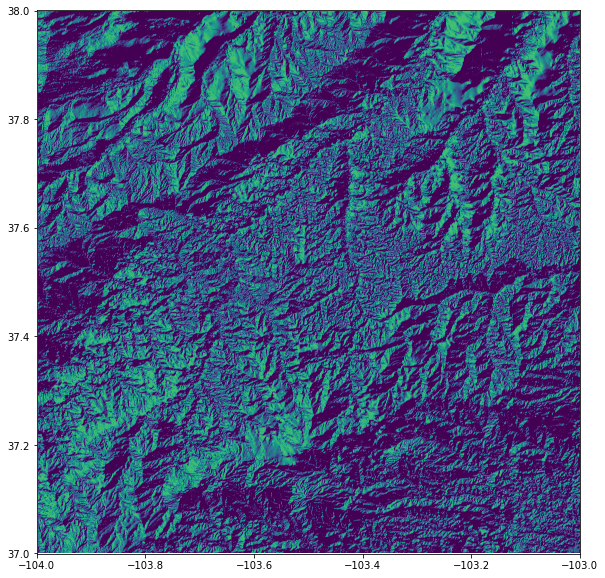

In [91]:
with rasterio.open('denver/1_hs.tif', 'r') as src:
    print(src.meta)
    hillshade = src.read(1)
    hillshade_mask = src.read_masks(1)
    hillshade_transform = src.profile['transform']
    
    fig, ax = plt.subplots(1,figsize = (10,10))
    
    rasterio.plot.show(np.ma.masked_where(hillshade_mask==0, hillshade), transform=hillshade_transform, ax=ax)
   
    plt.show()
    

IndentationError: unexpected indent (<ipython-input-92-78a66a3255a8>, line 5)